In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
path = os.listdir('../input/brain-tumor-classification-mri/Training')
classes = {'no_tumor': 0, 'pituitary_tumor': 1}

In [4]:
import cv2
X, Y = [], []
for cls in classes:
    pth = '../input/brain-tumor-classification-mri/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [5]:
np.unique(Y)

array([0, 1])

In [6]:
X = np.array(X)
y = np.array(Y)
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [7]:
X.shape

(1222, 200, 200)

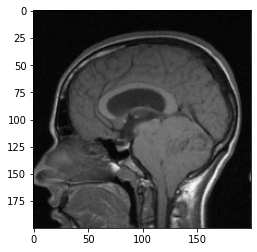

In [8]:
plt.imshow(X[0], cmap='gray')

In [9]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10, test_size=.20)

In [11]:
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

In [12]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [13]:
from sklearn.decomposition import PCA
pca = PCA(.98)
pca_train = pca.fit_transform(xtrain)
pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
lg = LogisticRegression(C=0.1)
lg.fit(pca_train, ytrain)
sv = SVC()
sv.fit(pca_train, ytrain)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


SVC()

In [15]:
print("Training Score: ", lg.score(pca_train, ytrain))
print("testing Score: ", lg.score(pca_test, ytest))

Training Score:  1.0
testing Score:  0.9714285714285714


In [16]:
print("Training Score: ", sv.score(pca_train, ytrain))
print("testing Score: ", sv.score(pca_test, ytest))

Training Score:  0.9928352098259979
testing Score:  0.9673469387755103


In [17]:
pred = sv.predict(pca_test)
np.where(ytest!=pred)

(array([  3,  57,  60, 138, 159, 207, 220, 225]),)

In [18]:
pred[6]

0

In [19]:
ytest[6]

0

In [20]:
#test Model
dec = {0: 'No Tumor', 1:'Tumor'}

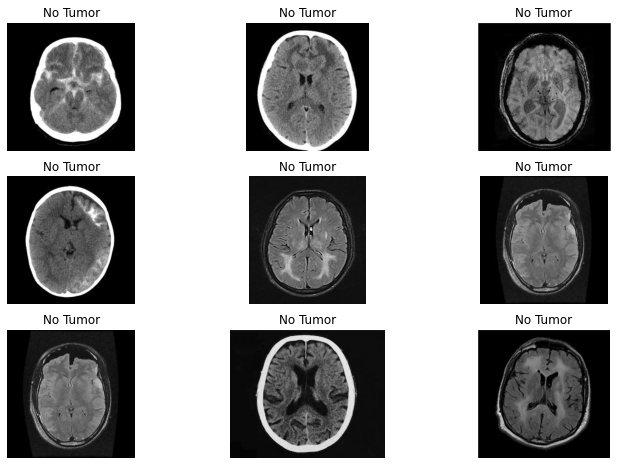

In [21]:
plt.figure(figsize = (12,8))
p=os.listdir('../input/brain-tumor-classification-mri/Testing')
c = 1
for i in os.listdir('../input/brain-tumor-classification-mri/Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)
    img=cv2.imread("../input/brain-tumor-classification-mri/Testing/no_tumor/"+i, 0)
    img1=cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1

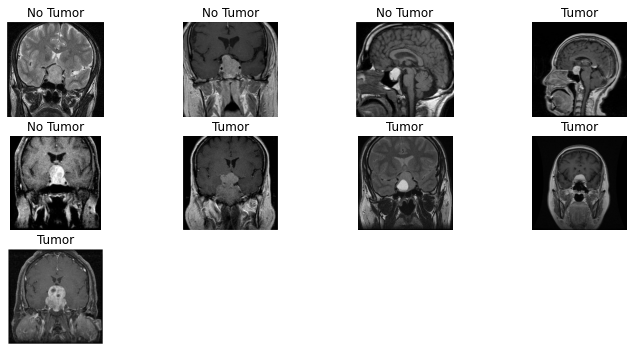

In [22]:
plt.figure(figsize = (12,8))
p=os.listdir('../input/brain-tumor-classification-mri/Testing')
c = 1
for i in os.listdir('../input/brain-tumor-classification-mri/Testing/pituitary_tumor/')[:9]:
    plt.subplot(4,4,c)
    img=cv2.imread("../input/brain-tumor-classification-mri/Testing/pituitary_tumor/"+i, 0)
    img1=cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1